A pretty great write up on SVMs:
* [Support Vector Machine — Simply Explained](https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496)

Another pretty great write up on SVMs:
* Part 1: [An intuitive introduction to Support Vector Machine](https://medium.com/swlh/support-vector-machine-from-scratch-ce095a47dc5c)
* Part 2: [Visualizing SVM with Python](https://medium.com/swlh/support-vector-machine-from-scratch-ce095a47dc5c)

In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np

from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# fmt: off

# Some fake data
test_grade = [90, 100, 85, 93, 88, 100, 
              97, 92, 89, 84, 55, 65, 75, 
              58, 69, 71, 72, 63, 70, 59]

project_grade = [100, 85, 98, 88, 87, 99, 
                 99, 86, 89, 100, 67, 71,
                 74, 73, 55, 59, 56, 72, 67, 72]

pass_fail = ["pass", "pass", "pass", "pass", "pass",
             "pass", "pass", "pass", "pass", "pass",
             "fail", "fail", "fail", "fail", "fail",
             "fail", "fail", "fail", "fail", "fail"]
# fmt: on

<IPython.core.display.Javascript object>

Create a dataframe using the 3 lists above as the columns.

In [3]:
df = pd.DataFrame(
    {"test_grade": test_grade, "project_grade": project_grade, "pass_fail": pass_fail}
)
df.head()


,test_grade,project_grade,pass_fail
0,90,100,pass
1,100,85,pass
2,85,98,pass
3,93,88,pass
4,88,87,pass


<IPython.core.display.Javascript object>

Convert the pass/fail column to be 1 if the record is a `'pass'` and 0 when the record is a `'fail'`. 

In [4]:
df["pass_fail"] = df["pass_fail"] == "pass"
df["pass_fail"] = df["pass_fail"].astype(int)
df.head()


,test_grade,project_grade,pass_fail
0,90,100,1
1,100,85,1
2,85,98,1
3,93,88,1
4,88,87,1


<IPython.core.display.Javascript object>

Make a scatter plot of test scores by project scores and color by whether the record passed or failed.

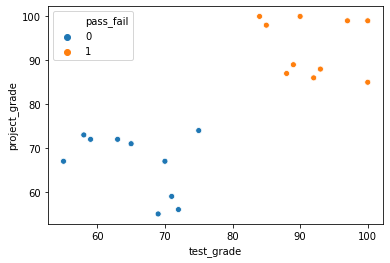

<IPython.core.display.Javascript object>

In [5]:
sns.scatterplot("test_grade", "project_grade", hue="pass_fail", data=df)

Look at the documenation for `SVC` which has already been loaded using `from sklearn.svm import SVC`.

In [6]:
SVC?

<IPython.core.display.Javascript object>

Use the documentation to fit an `SVC` model with a kernel type of `'linear'`.  No need to do a train/test split.  The target variable should be the pass/fail column.

In [7]:
X = df.drop(columns="pass_fail")
y = df["pass_fail"]

<IPython.core.display.Javascript object>

Use the documentation of `plot_decision_regions` to plot the decision boundary of the `SVC` classifier.  The `plot_decision_regions` function was imported with the line: `from mlxtend.plotting import plot_decision_regions`.

In [8]:
model = SVC(kernel="linear")
model.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<IPython.core.display.Javascript object>

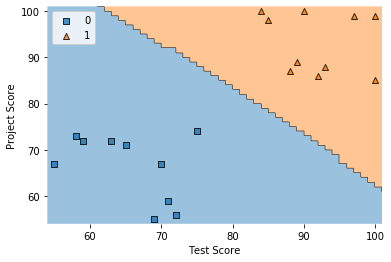

<IPython.core.display.Javascript object>

In [9]:
plot_decision_regions(X.to_numpy(), y.to_numpy(), model)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()

View the support vectors using your model's attribute holding this info.  Identify these points in the plot.

In [10]:
model.support_vectors_

array([[75., 74.],
       [88., 87.]])

<IPython.core.display.Javascript object>

View the model's coefficients.  Note, these are not interpreted in the same way as linear regression.

In [11]:
model.coef_

array([[0.07692308, 0.07692308]])

<IPython.core.display.Javascript object>

Look what happens to the coefficients if we make one of the features useless.  We're going to give every one a project grade of 0 so that the model can only use test grades as a predictor.

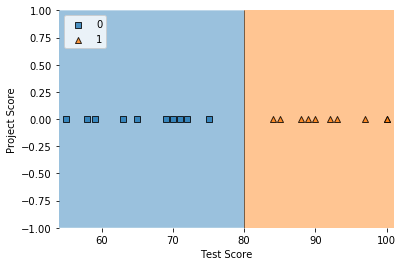

<IPython.core.display.Javascript object>

In [12]:
# Gen data
fake_df = pd.DataFrame(
    {"test_grades": test_grade, "project_grades": 0, "pass_fail": pass_fail}
)

fake_df["pass"] = (fake_df["pass_fail"] == "pass").astype(int)
fake_df = fake_df.drop(columns=["pass_fail"])

# Prep data for model
X = fake_df.drop(columns=["pass"])
y = fake_df["pass"]

# Fit model
model_compare_coef = SVC(kernel="linear")
model_compare_coef.fit(X, y)

plot_decision_regions(np.array(X), np.array(y), model_compare_coef)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()


With scaled data and a `'linear'` kernel, the magnitude of the coefficients provide an indication of feature importance.  Note these are not intrepreted in the same way as linear regression coefficients.

In [13]:
model_compare_coef.coef_

array([[0.22222222, 0.        ]])

<IPython.core.display.Javascript object>

-----

Create a dataframe with new records to classify.

* For the 1st record, use 90 as the test score and 73 as the project score.
* For the 2nd record, use 90 as the test score and 72 as the project score.

Make predictions of pass/fail for both of these records and add a column to the dataframe to hold these predictions. Call this column the same thing as the y column in your original dataframe.

In [14]:
new_df = pd.DataFrame({"test_grade": [90, 90], "project_grade": [73, 72]})

<IPython.core.display.Javascript object>

Combine this dataframe with the original one and replot the decision boundary with these 2 points included.

In [15]:
new_df["pass_fail"] = model.predict(new_df)
new_df

,test_grade,project_grade,pass_fail
0,90,73,1
1,90,72,0


<IPython.core.display.Javascript object>

In [19]:
full_df = pd.concat((new_df, df))

<IPython.core.display.Javascript object>

In [20]:
X = full_df.drop(columns="pass_fail")
y = full_df["pass_fail"]

<IPython.core.display.Javascript object>

Re-plot the decision boundary and include these 2 new points.

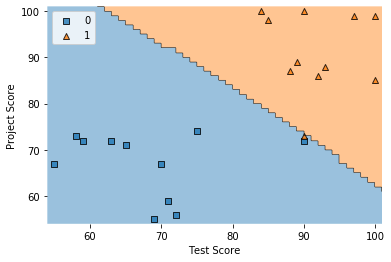

<IPython.core.display.Javascript object>

In [21]:
plot_decision_regions(X.to_numpy(), y.to_numpy(), model)

# These axes labels might be different depending
# on how you built the dataframe, and the order of columns in it
plt.xlabel("Test Score")
plt.ylabel("Project Score")
plt.legend(loc="upper left")
plt.show()